In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline

In [2]:
labels = ['NO_SMOKE', 'SMOKE']
img_size = 224
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('./newdataset')


In [4]:
nosmoke = 0 
smoke = 0 

for i, j in train:
    if j == 0:
        nosmoke+=1
    else:
        smoke+=1
        
print('NO SMOKE:', nosmoke)
print('SMOKE:', smoke)

NO SMOKE: 1189
SMOKE: 1111


NO_SMOKE


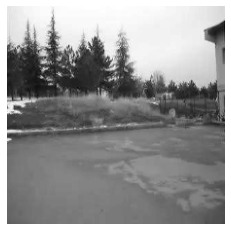

In [6]:
plt.imshow(train[1][0], cmap='gray')
plt.axis('off')
print(labels[train[1][1]])

In [20]:
from keras.utils import to_categorical
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)


# resize data for deep learning 
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

y=to_categorical(y)
print(y[2021])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

[0. 1.]


In [21]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [22]:
datagen = ImageDataGenerator()  

datagen.fit(X_train)

In [28]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

Dropout(0.25)

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

Dropout(0.25)

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="sigmoid"))
model.add(Dense(units=4096,activation="sigmoid"))
model.add(Dense(units=2, activation="softmax"))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 56, 56, 256)      

In [29]:




history = model.fit(X_train,y_train,batch_size=10 , validation_data=(X_val, y_val), epochs=15)

Epoch 1/15
148/148 [==============================] - 25s 166ms/step - loss: 0.8787 - accuracy: 0.5088 - val_loss: 0.7909 - val_accuracy: 0.4538
Epoch 2/15
148/148 [==============================] - 25s 167ms/step - loss: 0.7840 - accuracy: 0.4912 - val_loss: 0.8839 - val_accuracy: 0.4538
Epoch 3/15
148/148 [==============================] - 25s 168ms/step - loss: 0.8083 - accuracy: 0.5503 - val_loss: 0.9780 - val_accuracy: 0.4538
Epoch 4/15
148/148 [==============================] - 25s 170ms/step - loss: 0.5107 - accuracy: 0.7391 - val_loss: 0.3322 - val_accuracy: 0.8505
Epoch 5/15
148/148 [==============================] - 25s 171ms/step - loss: 0.2765 - accuracy: 0.8750 - val_loss: 0.1564 - val_accuracy: 0.9484
Epoch 6/15
148/148 [==============================] - 25s 172ms/step - loss: 0.1765 - accuracy: 0.9273 - val_loss: 0.1183 - val_accuracy: 0.9565
Epoch 7/15
148/148 [==============================] - 31s 210ms/step - loss: 0.1447 - accuracy: 0.9490 - val_loss: 0.1115 - val_ac

In [33]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 2s 164ms/step - loss: 0.0539 - accuracy: 0.9804


[0.0539059154689312, 0.980434775352478]

In [31]:
model.save("./trained_model/dm_model.h5")

In [62]:
from tensorflow.keras.models import load_model
loaded_model=load_model("./trained_model/dm_model.h5")


In [37]:
model.evaluate(X_train, y_train)

46/46 [==============================] - 6s 128ms/step - loss: 0.0583 - accuracy: 0.9810


[0.05831248685717583, 0.98097825050354]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


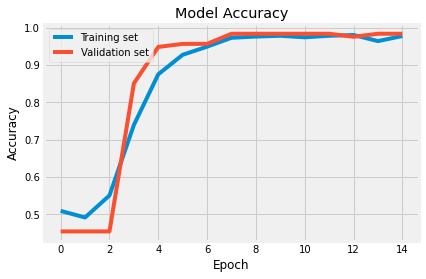

In [32]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.savefig("model_accuracy.png")

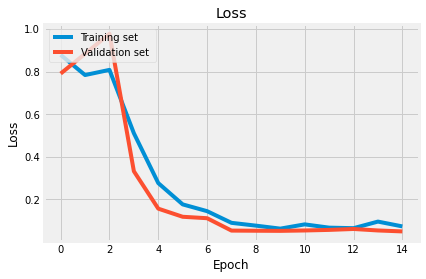

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set '], loc='upper left')
plt.savefig("model_loss.png")